## Nick Riccobono

### Compare UMaine semi-submersible floating platform with UMaine reference platform 

In [90]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [91]:
# Specific Power relationship (Eq. 6 of U-Mass upscaling ref)
# IEA 15MW 
ref_radius = 120
Sp = 15e6 / np.pi / ref_radius**2
print(f"Specific Power: {Sp:.0f} W/m**2")

new_power = np.array([12e6, 15e6, 17e6, 20e6])
new_radius = [np.sqrt(x/ np.pi / Sp) for x in new_power]

print("Upscaled Power Rating: ", new_power/1e6, "MW")
print("Upscaled Radius: ", np.round(new_radius), "m")

Specific Power: 332 W/m**2
Upscaled Power Rating:  [12. 15. 17. 20.] MW
Upscaled Radius:  [107. 120. 128. 139.] m


In [92]:
outputs_dir = os.path.join(os.getcwd(), 'outputs')
baseline_file = "orbit_semisub_cost_model_baseline.csv"
baseline_df = pd.read_csv(os.path.join(outputs_dir, baseline_file))

custom_file = "orbit_semisub_cost_model_custom.csv"
custom_df = pd.read_csv(os.path.join(outputs_dir, custom_file))
custom_df.tail()

,Unnamed: 0,mass,unit_cost,towing_speed,Turbine Rating
0,0,4153.0,13338901.0,6,12MW
1,1,4963.0,15864557.0,6,15MW
2,2,5511.0,17576776.0,6,17MW
3,3,5759.0,18349097.0,6,18MW
4,4,6231.0,19820602.0,6,20MW


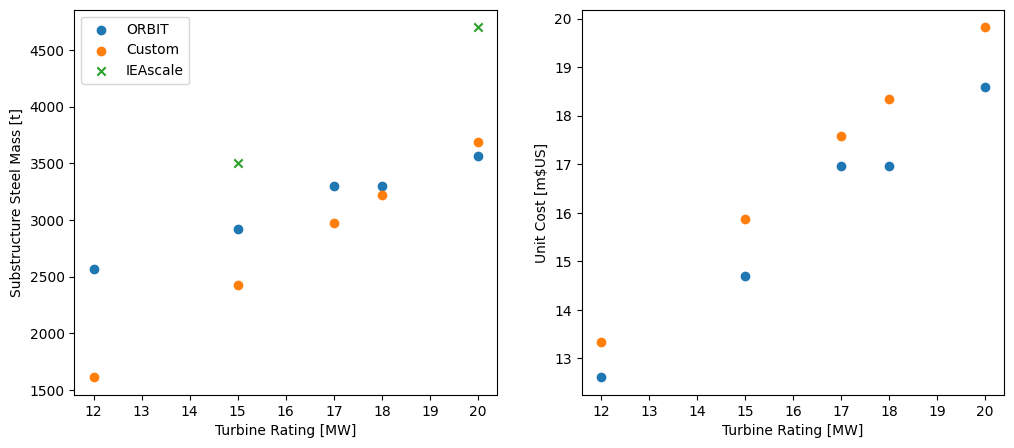

In [93]:
# Plot baseline versus custom 
turbine_rating = [float(x[0:2]) for x in baseline_df['Turbine Rating']]

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].scatter(turbine_rating, baseline_df['mass'], label='ORBIT')
ax[0].scatter(turbine_rating, custom_df['mass'], label='Custom')
ax[0].scatter([15.0, 20.0], [3.5e6/1e3, 4.7e6/1e3],label='IEAscale', marker='x')
ax[0].set_xlabel('Turbine Rating [MW]')
ax[0].set_ylabel('Substructure Mass [t]')
ax[0].legend()

ax[1].scatter(turbine_rating, baseline_df['unit_cost']/1e6,label='ORBIT')
ax[1].scatter(turbine_rating, custom_df['unit_cost']/1e6,label='Custom')
ax[1].set_xlabel('Turbine Rating [MW]')
ax[1].set_ylabel('Unit Cost [m$US]')

plt.show()